<a href="https://colab.research.google.com/github/AZhytnyk/DZ_DLA/blob/main/HW2_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/yulu_bike_sharing_dataset.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

In [4]:
df.head (2)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,weekday_num,week,year,day
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,Saturday,5,52,2011,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,Saturday,5,52,2011,1


## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

/tmp/ipython-input-25-3377415699.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['count'].resample('M').mean()


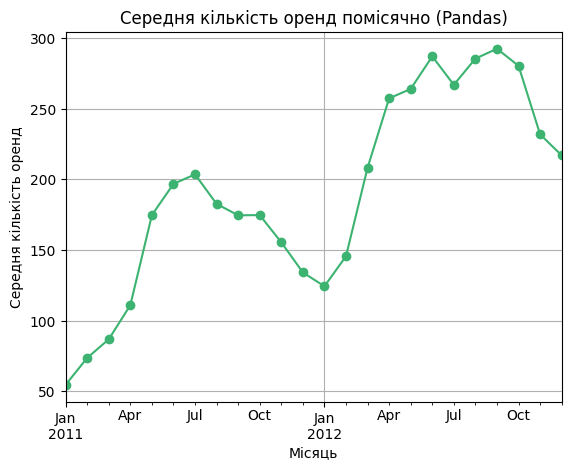

In [25]:
# Середня кількість оренд помісячно
monthly_avg = df['count'].resample('M').mean()

# Побудова графіка через pandas
monthly_avg.plot(
    kind='line',
    marker='o',
    color='mediumseagreen',
    title='Середня кількість оренд помісячно (Pandas)',
    ylabel='Середня кількість оренд',
    xlabel='Місяць'
);
plt.grid(True)
plt.show()

Чомусь навіть з використанням ";" в кінці налаштувань і plt.show() видає зайвий напис над графіком.

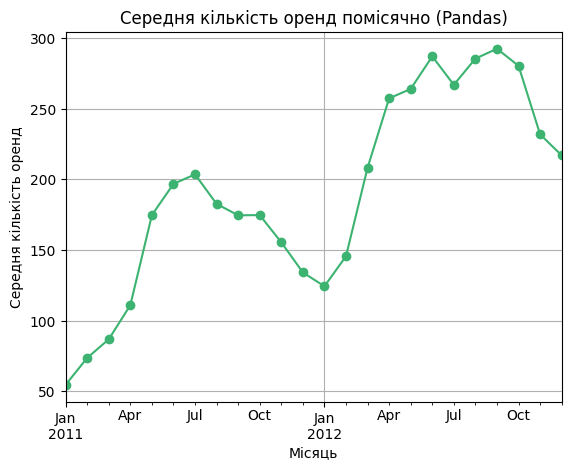

In [14]:
ax = monthly_avg.plot(
    kind='line',
    marker='o',
    color='mediumseagreen'
)
ax.set_title('Середня кількість оренд помісячно (Pandas)')
ax.set_xlabel('Місяць')
ax.set_ylabel('Середня кількість оренд')
plt.grid(True)
plt.show()

/tmp/ipython-input-24-1606209037.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['count'].resample('M').mean()


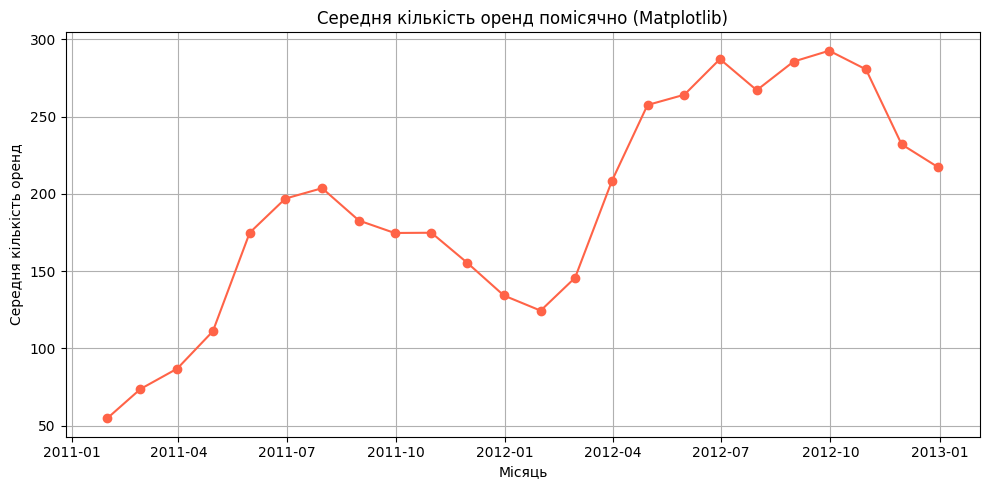

In [24]:
# Те саме середнє значення
monthly_avg = df['count'].resample('M').mean()

# Побудова графіка через matplotlib
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='tomato', linestyle='-');
plt.title('Середня кількість оренд помісячно (Matplotlib)')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True)
plt.tight_layout()
plt.show()

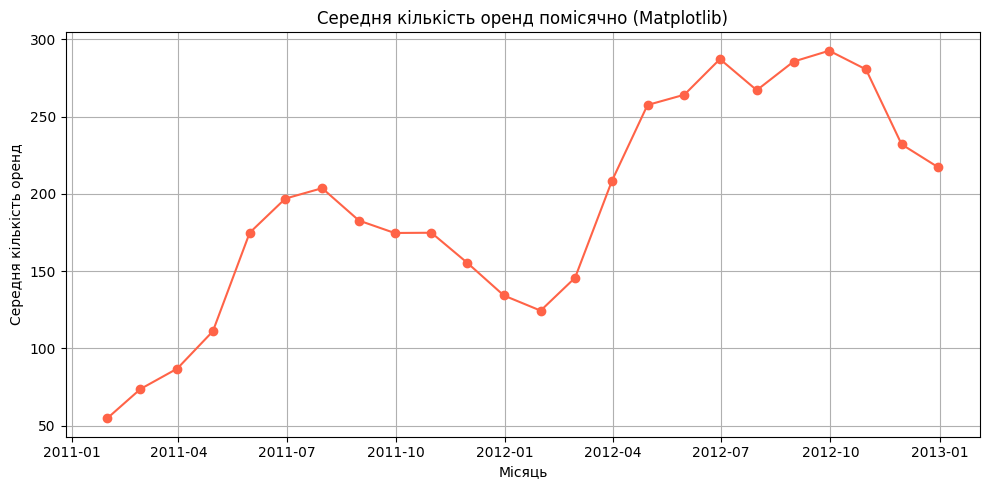

In [19]:
plt.figure(figsize=(10, 5))
line = plt.plot(
    monthly_avg.index,
    monthly_avg.values,
    marker='o',
    color='tomato',
    linestyle='-'
)
plt.title('Середня кількість оренд помісячно (Matplotlib)')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True)
plt.tight_layout()
plt.show()

Відрізняється тип підпису місяця, другий графік "не торкається" країв.
У першому варіанті трохи менше коду, та якщо потрібно швидко подивитися тренд — pandas.plot() цілком підходить.

Якщо ж потрібно підготувати презентаційний графік або створити складні візуалізації — краще використовувати matplotlib.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [22]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

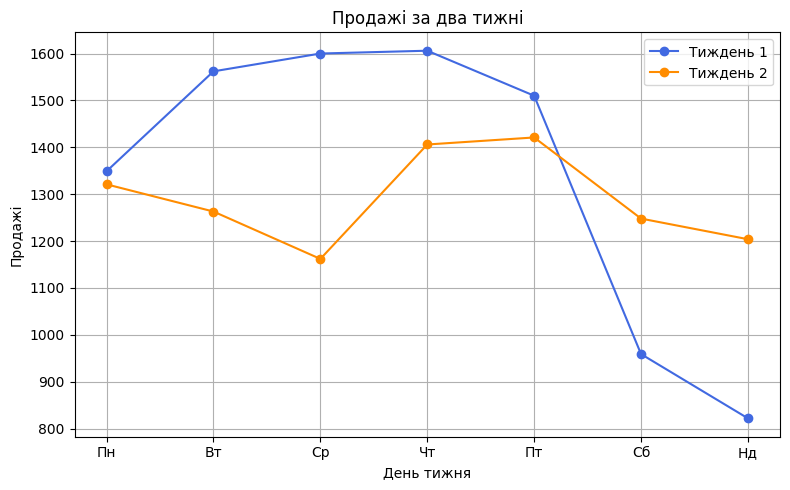

In [23]:
# Назви днів для вісі X
day_labels = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Нд']

plt.figure(figsize=(8, 5))

# Побудова ліній для двох тижнів
plt.plot(days, sales_week1, marker='o', label='Тиждень 1', color='royalblue')
plt.plot(days, sales_week2, marker='o', label='Тиждень 2', color='darkorange')

# Оформлення графіка
plt.title('Продажі за два тижні')
plt.xlabel('День тижня')
plt.ylabel('Продажі')
plt.xticks(days, day_labels)
plt.grid(True)
plt.legend()  # Показати легенду
plt.tight_layout()
plt.show()

Тиждень 2 виглядає стабільнішим, бо коливання між днями менші.

У тижні 1 видно різкий спад у вихідні (субота та неділя).

In [26]:
std_week1 = np.std(sales_week1)
std_week2 = np.std(sales_week2)

print(f"Стандартне відхилення тиждень 1: {std_week1:.2f}")
print(f"Стандартне відхилення тиждень 2: {std_week2:.2f}")

Стандартне відхилення тиждень 1: 300.00
Стандартне відхилення тиждень 2: 90.91


## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

/tmp/ipython-input-30-3498186424.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_temp = df.resample('M').temp.mean()


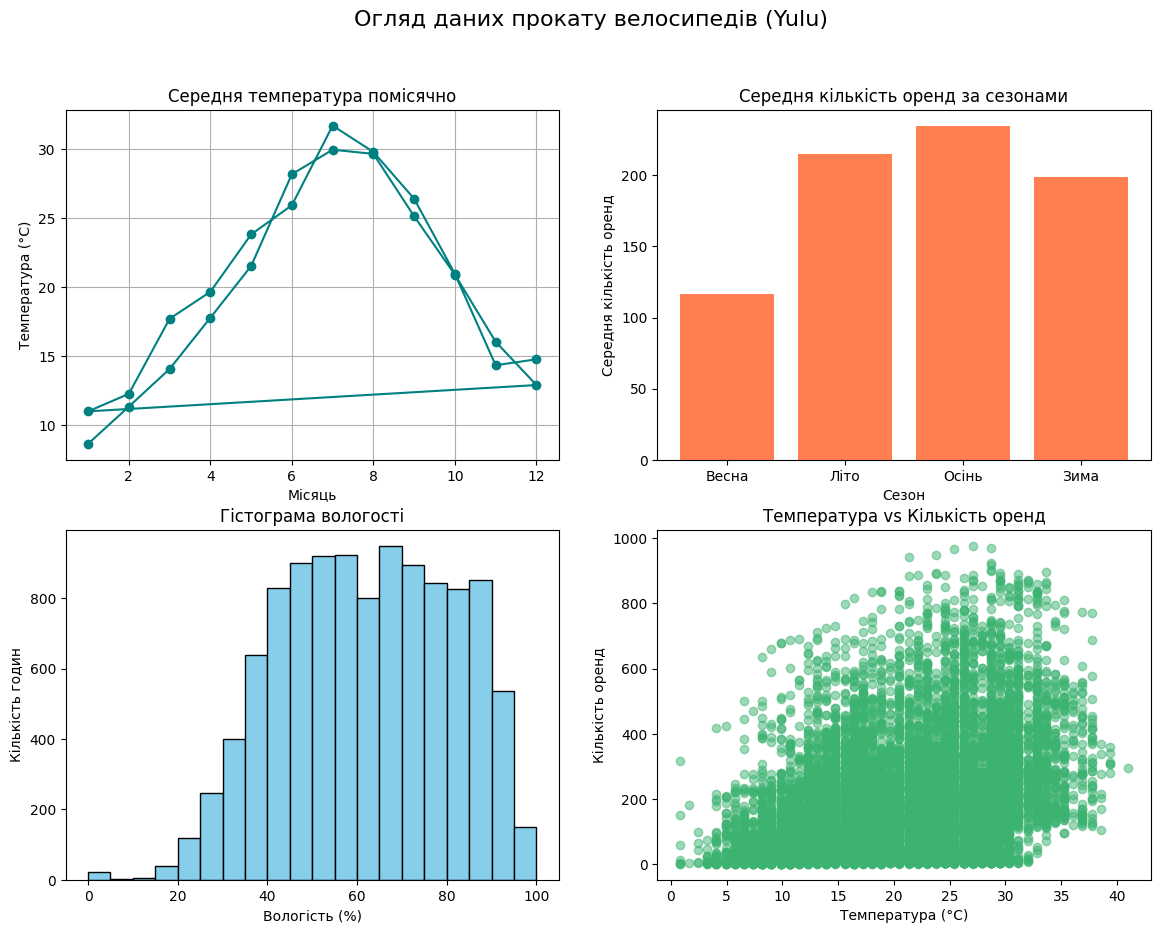

In [30]:
# 1. Середня температура помісячно (лінійний графік)
monthly_avg_temp = df.resample('M').temp.mean()

# 2. Середня кількість оренд за сезонами (по годинах, для нормалізації)
season_avg_hourly_rentals = df.groupby('season')['count'].mean()

# 3. Гістограма вологості
humidity = df['humidity']

# 4. Scatter plot: температура vs кількість оренд
temp = df['temp']
rentals = df['count']

# Створення сітки 2x2
plt.figure(figsize=(14, 10))
plt.suptitle('Огляд даних прокату велосипедів (Yulu)', fontsize=16);

# --- 1. Лінійний графік температури ---
plt.subplot(2, 2, 1)
plt.plot(monthly_avg_temp.index.month, monthly_avg_temp.values, marker='o', color='teal')
plt.title('Середня температура помісячно')
plt.xlabel('Місяць')
plt.ylabel('Температура (°C)')
plt.grid(True);

# --- 2. Стовпчикова діаграма за сезонами ---
plt.subplot(2, 2, 2)
season_labels = ['Весна', 'Літо', 'Осінь', 'Зима']
plt.bar(season_labels, season_avg_hourly_rentals.values, color='coral')
plt.title('Середня кількість оренд за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Середня кількість оренд');

# --- 3. Гістограма вологості ---
plt.subplot(2, 2, 3)
plt.hist(humidity, bins=20, color='skyblue', edgecolor='black')
plt.title('Гістограма вологості')
plt.xlabel('Вологість (%)')
plt.ylabel('Кількість годин');

# --- 4. Scatter plot: температура vs оренди ---
plt.subplot(2, 2, 4)
plt.scatter(temp, rentals, alpha=0.5, color='mediumseagreen')
plt.title('Температура vs Кількість оренд')
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість оренд');


plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

/tmp/ipython-input-31-592033883.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_temp = df.resample('M').temp.mean()


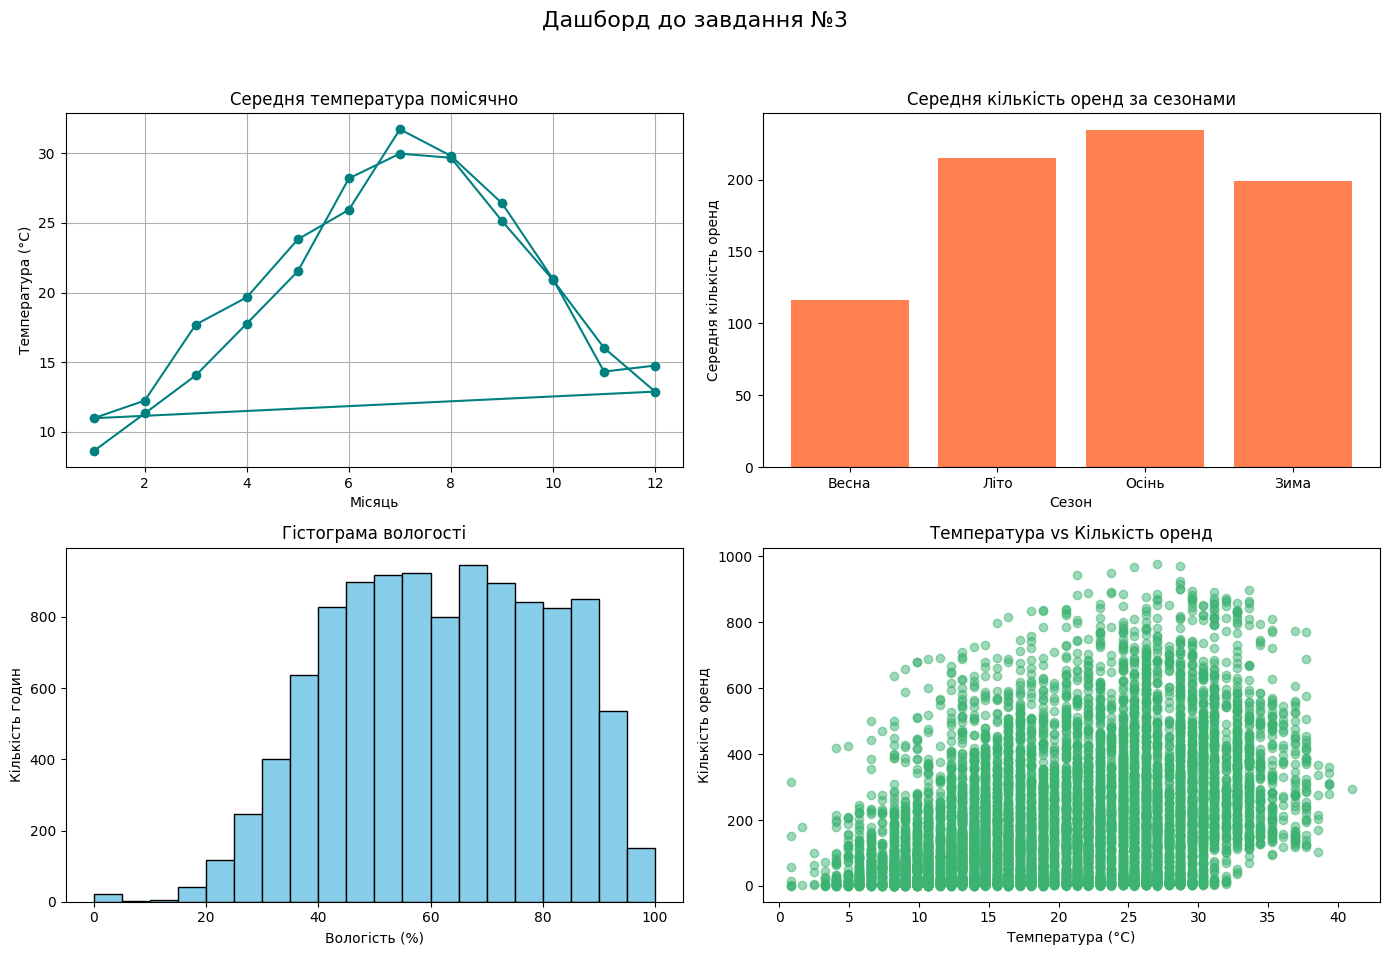

In [31]:
# Дані для графіків
monthly_avg_temp = df.resample('M').temp.mean()
season_avg_hourly_rentals = df.groupby('season')['count'].mean()
humidity = df['humidity']
temp = df['temp']
rentals = df['count']
season_labels = ['Весна', 'Літо', 'Осінь', 'Зима']

# Створення фігури з сіткою 2x2
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Дашборд до завдання №3', fontsize=16)

# --- 1. Лінійний графік середньої температури помісячно ---
ax[0, 0].plot(monthly_avg_temp.index.month, monthly_avg_temp.values, marker='o', color='teal')
ax[0, 0].set_title('Середня температура помісячно')
ax[0, 0].set_xlabel('Місяць')
ax[0, 0].set_ylabel('Температура (°C)')
ax[0, 0].grid(True)

# --- 2. Стовпчикова діаграма середніх оренд за сезонами ---
ax[0, 1].bar(season_labels, season_avg_hourly_rentals.values, color='coral')
ax[0, 1].set_title('Середня кількість оренд за сезонами')
ax[0, 1].set_xlabel('Сезон')
ax[0, 1].set_ylabel('Середня кількість оренд')

# --- 3. Гістограма вологості ---
ax[1, 0].hist(humidity, bins=20, color='skyblue', edgecolor='black')
ax[1, 0].set_title('Гістограма вологості')
ax[1, 0].set_xlabel('Вологість (%)')
ax[1, 0].set_ylabel('Кількість годин')

# --- 4. Scatter plot: температура vs оренди ---
ax[1, 1].scatter(temp, rentals, alpha=0.5, color='mediumseagreen')
ax[1, 1].set_title('Температура vs Кількість оренд')
ax[1, 1].set_xlabel('Температура (°C)')
ax[1, 1].set_ylabel('Кількість оренд')

# Автоматичне вирівнювання графіків + місце для заголовка
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Чесно кажучи, то на такій кількості графіків я, як новачок, відчуваю однакову складність. Є розуміння, що новіший спосіб варто відпрацьовувати, бо він використовуватиметься безпосередньо у майбутній роботі, але його гнучкість відчути руками зможу тільки з практикою.

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [34]:
import matplotlib.dates as mdates

/tmp/ipython-input-35-3258572185.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_stats = df.resample('M')['count'].agg(['mean', 'min', 'max'])


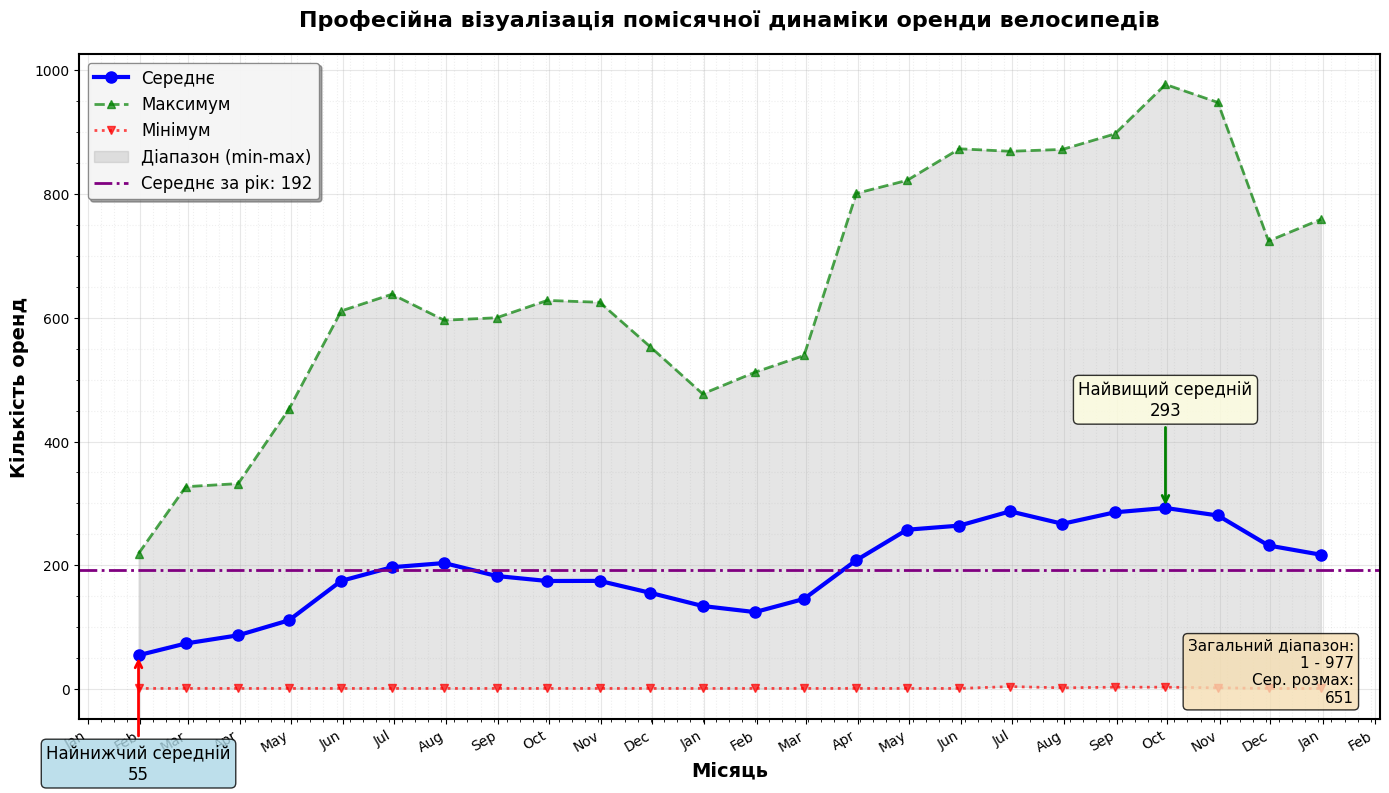

In [35]:
# Групування помісячно: середнє, мінімум, максимум
monthly_stats = df.resample('M')['count'].agg(['mean', 'min', 'max'])
monthly_stats.index.name = 'Дата'

# Середнє за рік
overall_mean = df['count'].mean()

# Індекси екстремумів
max_idx = monthly_stats['mean'].idxmax()
min_idx = monthly_stats['mean'].idxmin()

# --- Побудова графіка ---
fig, ax = plt.subplots(figsize=(14, 8))

# Лінії з різними стилями
ax.plot(monthly_stats.index, monthly_stats['mean'], 'b-o', linewidth=3,
        label='Середнє', markersize=8)
ax.plot(monthly_stats.index, monthly_stats['max'], 'g--^', linewidth=2,
        label='Максимум', markersize=6, alpha=0.7)
ax.plot(monthly_stats.index, monthly_stats['min'], 'r:v', linewidth=2,
        label='Мінімум', markersize=6, alpha=0.7)

# Заливка між min та max
ax.fill_between(monthly_stats.index, monthly_stats['min'], monthly_stats['max'],
                alpha=0.2, color='gray', label='Діапазон (min-max)')

# Анотація для найвищого середнього
ax.annotate(f'Найвищий середній\n{monthly_stats["mean"].max():.0f}',
            xy=(max_idx, monthly_stats['mean'].max()),
            xytext=(max_idx, monthly_stats['mean'].max() + 150),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow', alpha=0.8))

# Анотація для найнижчого середнього
ax.annotate(f'Найнижчий середній\n{monthly_stats["mean"].min():.0f}',
            xy=(min_idx, monthly_stats['mean'].min()),
            xytext=(min_idx, monthly_stats['mean'].min() - 200),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.8))

# Горизонтальна лінія середнього за рік
ax.axhline(y=overall_mean, color='purple', linestyle='-.', linewidth=2,
           label=f'Середнє за рік: {overall_mean:.0f}')

# Оформлення осей
ax.set_xlabel('Місяць', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість оренд', fontsize=14, fontweight='bold')
ax.set_title('Професійна візуалізація помісячної динаміки оренди велосипедів',
             fontsize=16, fontweight='bold', pad=20)

# Форматування дати на осі X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
fig.autofmt_xdate()

# Сітка: основна та допоміжна
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.minorticks_on()
ax.grid(True, which='minor', linestyle=':', alpha=0.2)

# Легенда зі стилем
legend = ax.legend(loc='upper left', fontsize=12, shadow=True,
                   fancybox=True, framealpha=0.9)
legend.get_frame().set_edgecolor('gray')

# Текстовий блок зі статистикою
range_text = f"Загальний діапазон:\n{monthly_stats['min'].min():.0f} - {monthly_stats['max'].max():.0f}"
std_text = f"Сер. розмах:\n{(monthly_stats['max'] - monthly_stats['min']).mean():.0f}"
box_text = f"{range_text}\n{std_text}"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.98, 0.02, box_text, transform=ax.transAxes,
        fontsize=11, verticalalignment='bottom', horizontalalignment='right',
        bbox=props)

# Оформлення рамки
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()

Анотації допомагають:

- Фокусувати увагу — вони миттєво вказують на ключові точки, як-от пік або спад.
- Пояснювати контекст — наприклад, чому певний місяць має аномальне значення.
- Підвищувати читабельність — графік стає зрозумілішим для тих, хто вперше його бачить.
- Замінювати додатковий аналіз — важливу інфо можна подати одразу на графіку без окремого пояснення в тексті.

Функція fill_between() виділяє діапазон значень — наприклад, область між мінімумом і максимумом.

Текстовий блок підсумовує ключові цифри — середнє, розмах, стандартне відхилення, економить час — не потрібно шукати ці значення вручну, вбудовує пояснення прямо у візуалізацію.

Анотації, заливка і текстові блоки — це інструменти пояснення, які роблять графік не просто красивим, а інформативним, зрозумілим і корисним для ухвалення рішень.